<a href="https://colab.research.google.com/github/zhaooao/ai./blob/main/grid_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 尋找最佳超參數：網格搜索 (grid search)

您可以使用網格搜尋和交叉驗證來找到模型的最佳超參數值。找到這些值後，您可以使用整個訓練集，並利用透過交叉驗證找到的最佳超參數值來建立模型。最後，使用測試集來評估模型。

以下是使用 grid_search 尋找最優多項式迴歸模型的範例。這是一個廣義線性模型，其中多項式的次數是一個可調參數。在 Scikit-Learn 中，我們可以用一個簡單的線性迴歸 (linear regression) 結合多項式預處理器來實現它。我們將使用管道將這些操作串聯起來。

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [ ]:
# we will discuss polynomial features and pipelines more fully later
def PolynomialRegression(degree=2, **kwargs):
  return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

現在讓我們建立一些適合迴歸模型的資料：

In [ ]:
import numpy as np

In [ ]:
def make_data(N, err=1.0, rseed=1):
  # randomly sample the data
  rng = np.random.RandomState(rseed)
  X = rng.rand(N, 1) ** 2
  y = 10 - 1. / (X.ravel() + 0.1) #X.ravel()returns a 1-D array
  if err > 0:
    y += err * rng.randn(N)
  return X, y

X, y = make_data(40)

我們將探索一個由模型特徵組成的三維網格，即多項式次數 (polynomial degree)、指示是否擬合截距的標誌 (fit intercept) 以及指示是否對問題進行歸一化 (normalize) 的標誌。這可以使用 Scikit-Learn 的 GridSearchCV 元估計器進行設定：

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'polynomialfeatures__degree': np.arange(21),
       'linearregression__fit_intercept': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

要使用 GridSearchCV 類，首先需要使用字典指定要搜尋的參數。然後，GridSearchCV 將執行所有必要的模型擬合。字典的鍵是我們要調整的參數的名稱（例如 polynomialfeatures__degree），值是我們要嘗試的參數設定（例如 0、1、2、3 …、20）。

備註：param_grid 所需的參數名稱的候選可以透過 model.get_params().keys() 找到。例如：

In [ ]:
PolynomialRegression().get_params().keys()

dict_keys(['memory', 'steps', 'transform_input', 'verbose', 'polynomialfeatures', 'linearregression', 'polynomialfeatures__degree', 'polynomialfeatures__include_bias', 'polynomialfeatures__interaction_only', 'polynomialfeatures__order', 'linearregression__copy_X', 'linearregression__fit_intercept', 'linearregression__n_jobs', 'linearregression__positive'])

呼叫 fit() 方法將在每個網格點擬合模型，並追蹤整個過程中的分數：

In [ ]:
grid.fit(X, y)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])})

既然已經適合，我們可以要求最佳參數如下：

In [ ]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'polynomialfeatures__degree': np.int64(4)}

In [ ]:
grid.best_score_

np.float64(0.8972710305736532)

將交叉驗證的結果視覺化通常很有幫助，這樣可以理解模型泛化能力如何依賴我們正在搜尋的參數。網格搜尋的結果可以在 cv_results_ 屬性中找到，該屬性是一個儲存搜尋各個方面的字典。它包含大量細節，如以下輸出所示，最好將其轉換為 Pandas DataFrame 後再查看：

In [ ]:
import pandas as pd
from IPython.display import display

In [ ]:
# convert to DataFrame
results = pd.DataFrame(grid.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_linearregression__fit_intercept,param_polynomialfeatures__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006692,0.006661,0.005282,0.003603,True,0,"{'linearregression__fit_intercept': True, 'pol...",-0.602466,-0.002046,-0.005141,-0.084480,-0.043421,-0.219189,-0.094565,-0.150187,0.196800,19
1,0.006665,0.005573,0.004003,0.003250,True,1,"{'linearregression__fit_intercept': True, 'pol...",0.592417,0.529559,0.780178,0.490099,0.765085,0.523538,0.797401,0.639754,0.125679,18
2,0.004279,0.003401,0.002189,0.000827,True,2,"{'linearregression__fit_intercept': True, 'pol...",0.821356,0.891900,0.963736,0.812955,0.934238,0.807794,0.803378,0.862194,0.061984,14
3,0.002882,0.000331,0.001701,0.000053,True,3,"{'linearregression__fit_intercept': True, 'pol...",0.922981,0.839170,0.925097,0.718688,0.967829,0.954963,0.869251,0.885426,0.080012,5
4,0.003503,0.001520,0.001820,0.000072,True,4,"{'linearregression__fit_intercept': True, 'pol...",0.954819,0.791224,0.915322,0.795572,0.966332,0.939547,0.918082,0.897271,0.067840,2


最後，如果我們願意，我們可以使用最佳模型並展示與我們數據的擬合度

(np.float64(-0.04687651021505175),
 np.float64(0.9844070023112612),
 np.float64(-0.7308177116555796),
 np.float64(10.902869392322714))

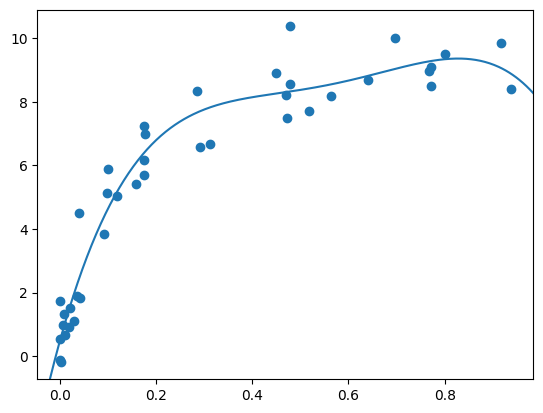

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
X_test = np.linspace(-0.1, 1.1, 500)[:, None]
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim)